In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset=pd.read_csv("Mall_customers.csv")

In [3]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
X=dataset.iloc[:,[3,4]].values

In [5]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [6]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

centers=[[1,1],[-1,-1],[1,-1]]

X, labels_true=make_blobs(n_samples=200, centers=centers,  cluster_std=0.4, random_state=0)
X=StandardScaler().fit_transform(X)

<function matplotlib.pyplot.show(close=None, block=None)>

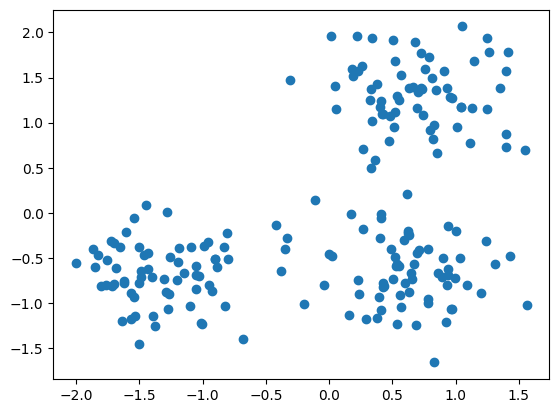

In [7]:
plt.scatter(X[:,0], X[:, 1])
plt.show

In [8]:
from sklearn import metrics
from sklearn.cluster import DBSCAN

db=DBSCAN(eps=0.3, min_samples=10).fit(X)
labels=db.labels_

n_clusters_ = len(set(labels)) - (1 if -1  in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)


Estimated number of clusters: 3
Estimated number of noise points: 40


In [9]:
print(f"Homogeneity:{metrics.homogeneity_score(labels_true,labels):.3f}")
print(f"Completeness:{metrics.completeness_score(labels_true,labels):.3f}")
print(f"v-measure:{metrics.v_measure_score(labels_true,labels):.3f}")
print(f"Adjusted Rand Index:{metrics.adjusted_rand_score(labels_true,labels):.3f}")
print(
    "Adjusted Mutual Information:"
    f"{metrics.adjusted_mutual_info_score(labels_true,labels):.3f}"
)
print(f"silhouette Coefficient:{metrics.silhouette_score(X,labels):.3f}")


Homogeneity:0.811
Completeness:0.648
v-measure:0.720
Adjusted Rand Index:0.690
Adjusted Mutual Information:0.717
silhouette Coefficient:0.457


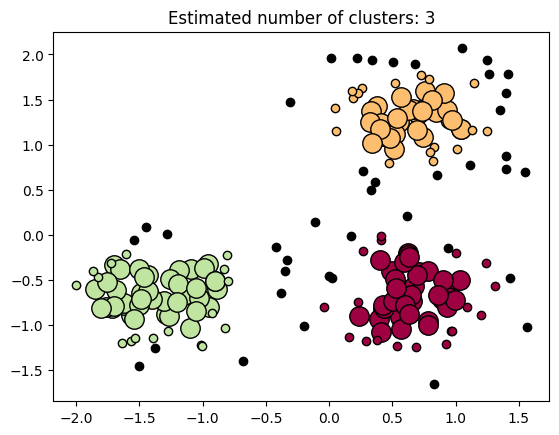

In [10]:
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()


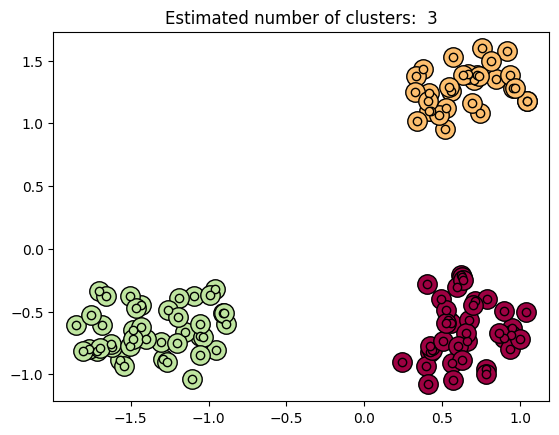

In [11]:
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
    
        col=[0, 0, 0, 1]

    class_member_mask = labels ==  k

    xy=X[class_member_mask & core_samples_mask]
    plt.plot(
         xy[:, 0],
         xy[:, 1],
          "o",
         markerfacecolor=tuple(col),
         markeredgecolor="k",
         markersize=14,
    )
    
    xy=X[class_member_mask & core_samples_mask]
    plt.plot(
         xy[:, 0],
         xy[:, 1],
          "o",
         markerfacecolor=tuple(col),
         markeredgecolor="k",
         markersize=6,
    )

plt.title(f"Estimated number of clusters:  {n_clusters_}")
plt.show()
